# SVM vs Perceptron Testing Accuracy

The objective of this notebook is to assess the relationship between the testing accuracy of an SVM with a linear kernel and a Perceptron both trained / fitted to the same training sets.

### Block used for importing local ml package

In [224]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Constraints of experiements

* Work on 2 dimensional space.
* Each test uses a large persistent testing set.
* Datasets are generated with uniform distribution.
* A small margin is kept constant.
* All datasets are labeled using y = x as the optimal separation line.

### Settings global state variables

In [225]:
test_size = 5000
x_start = -200
y_start = -200
x_end = 200
y_end = 200
margin = 4

### Generating testing set for y = x separation line

In [226]:
import numpy as np
from ml import datagen

test_set, test_labels = map(
    np.array, 
    datagen.make_uniform(test_size, x_start, x_end, y_start, y_end, margin)
)

## Experiment 1

Collect the average testing accuracies for an SVM and perceptron after being training on small training sets.
The perceptron is only trained on the data once, not until convegence.

Procedure:
1. Establish a range for n from 2 - 10.
2. Establish a repeat count for getting averages.
3. Enter a for loop for the range.
4. Enter a for loop for the repeat count.
5. Create a train set. Train / fit new perceptron and SVM.
6. Classify against test set, save the accuracies of each.

In [227]:
import statistics
from ml import datagen
from sklearn import svm

dimensions = 2
learning_rate = 0.25
n_start = 2
n_end = 10
samples_per_n = 100

# data will contain n_end-n_start elements.
# Each element with consist of [N, average accuracy, standard deviation]
svm_kernel = []
for kernel in (('linear', 'rbf', 'poly')):
    svm_data = []
    for train_size in range(n_start, n_end+1):
        print('generating', kernel, train_size)

        # Contains accuracies=
        svm_samples = []
        for __ in range(samples_per_n):

            # 1. Generate train set with at least 1 of each class
            train_set = []
            train_labels = []
            while list(train_labels).count(1) < 1 or list(train_labels).count(-1) < 1:
                train_set, train_labels = map(
                    np.array,
                    datagen.make_uniform(train_size, x_start, x_end, y_start, y_end, margin)
                )

            # 2. Train / fit perceptron and SVM.

            clf = svm.SVC(kernel=kernel, C=1.0)
            clf.fit(train_set, train_labels)

            # 3. Gather classification accuracy data.
            svm_results = clf.predict(test_set)

            svm_acc = sum(1 if x == y else 0 for x, y in zip(svm_results, test_labels))
            svm_acc /= len(test_set)

            svm_samples.append(svm_acc)

        svm_avg = statistics.mean(svm_samples)
        svm_std = statistics.pstdev(svm_samples)
        svm_data.append([train_size, svm_avg, svm_std, kernel])
    svm_kernel.append(svm_data)

generating linear 2
generating linear 3
generating linear 4
generating linear 5
generating linear 6
generating linear 7
generating linear 8
generating linear 9
generating linear 10
generating rbf 2
generating rbf 3
generating rbf 4
generating rbf 5
generating rbf 6
generating rbf 7
generating rbf 8
generating rbf 9
generating rbf 10
generating poly 2
generating poly 3
generating poly 4
generating poly 5
generating poly 6
generating poly 7
generating poly 8
generating poly 9
generating poly 10


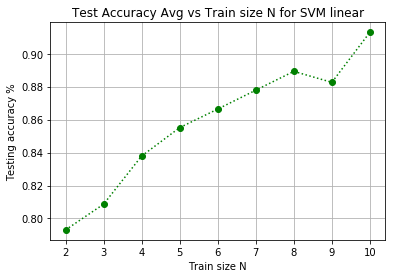

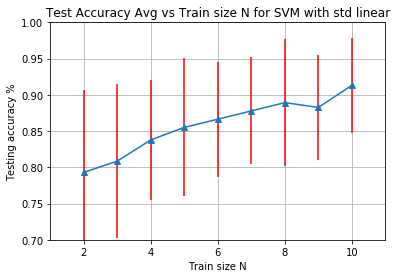

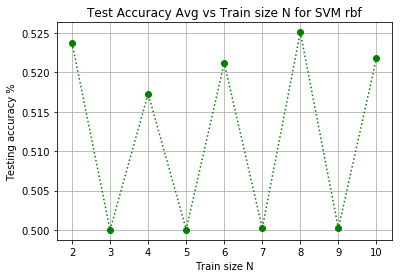

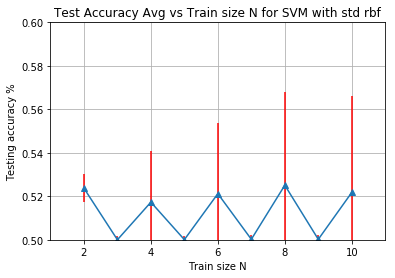

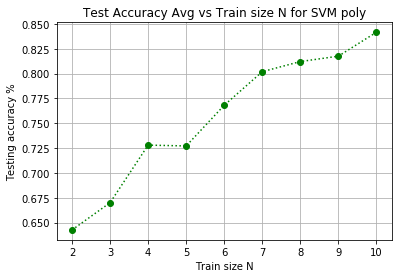

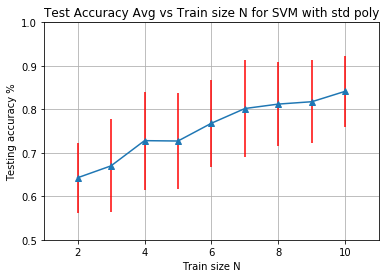

In [228]:
# Plot the per and svm data.

import matplotlib.pyplot as plt
for svm_data in svm_kernel:
    plt.title('Test Accuracy Avg vs Train size N for SVM {kernel}'.format(kernel=svm_data[0][3]))
    plt.xlabel('Train size N')
    plt.ylabel('Testing accuracy %')
    plt.grid(True)
    # SVM data in green
    plt.plot(
        [point[0] for point in svm_data],
        [point[1] for point in svm_data],
        'g:'
    )
    plt.plot(
        [point[0] for point in svm_data],
        [point[1] for point in svm_data],
        'go'
    )

    # Same as above but with standard deviation
    plt.figure()
    plt.title('Test Accuracy Avg vs Train size N for SVM with std {kernel}'.format(kernel=svm_data[0][3]))
    plt.xlabel('Train size N')
    plt.ylabel('Testing accuracy %')
    std = []
    std_uncertainty = []
    for point in svm_data:
        std.append(point[1])
        std_uncertainty.append(point[2])
    plt_min = round(min(std) - max(std_uncertainty), 1)
    plt_max = round(max(std) + max(std_uncertainty), 1)
    plt.axis([1, 11, plt_min, plt_max])
    plt.grid(True)
    # Perceptron data in red
    plt.errorbar(
        [point[0] for point in svm_data],
        [point[1] for point in svm_data],
        [point[2] for point in svm_data],
        ecolor='r',
        marker='^'
    )


    plt.show()

## Experiment 2
Same as 1 but with larger N bounds

In [229]:
import statistics
from ml import datagen
from sklearn import svm

dimensions = 2
learning_rate = 0.25
n_start = 10
n_end = 30
samples_per_n = 100

# data will contain n_end-n_start elements.
# Each element with consist of [N, average accuracy, standard deviation]

svm_kernel_2 = []
for kernel in (('linear', 'rbf', 'poly')):
    svm_data_2 = []
    for train_size in range(n_start, n_end+1):
        print('generating', kernel, train_size)

        # Contains accuracies
        svm_samples = []
        for __ in range(samples_per_n):

            # 1. Generate train set with at least 1 of each class
            train_set = []
            train_labels = []
            while list(train_labels).count(1) < 1 or list(train_labels).count(-1) < 1:
                train_set, train_labels = map(
                    np.array,
                    datagen.make_uniform(train_size, x_start, x_end, y_start, y_end, margin)
                )

            # 2. Train / fit perceptron and SVM.

            clf = svm.SVC(kernel=kernel, C=1.0)
            clf.fit(train_set, train_labels)

            # 3. Gather classification accuracy data.
            svm_results = clf.predict(test_set)

            svm_acc = sum(1 if x == y else 0 for x, y in zip(svm_results, test_labels))
            svm_acc /= len(test_set)

            svm_samples.append(svm_acc)

        svm_avg = statistics.mean(svm_samples)
        svm_std = statistics.pstdev(svm_samples)
        svm_data_2.append([train_size, svm_avg, svm_std, kernel])
    svm_kernel_2.append(svm_data_2)

generating linear 10
generating linear 11
generating linear 12
generating linear 13
generating linear 14
generating linear 15
generating linear 16
generating linear 17
generating linear 18
generating linear 19
generating linear 20
generating linear 21
generating linear 22
generating linear 23
generating linear 24
generating linear 25
generating linear 26
generating linear 27
generating linear 28
generating linear 29
generating linear 30
generating rbf 10
generating rbf 11
generating rbf 12
generating rbf 13
generating rbf 14
generating rbf 15
generating rbf 16
generating rbf 17
generating rbf 18
generating rbf 19
generating rbf 20
generating rbf 21
generating rbf 22
generating rbf 23
generating rbf 24
generating rbf 25
generating rbf 26
generating rbf 27
generating rbf 28
generating rbf 29
generating rbf 30
generating poly 10
generating poly 11
generating poly 12
generating poly 13
generating poly 14
generating poly 15
generating poly 16
generating poly 17
generating poly 18
generating

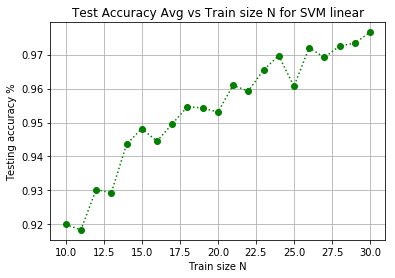

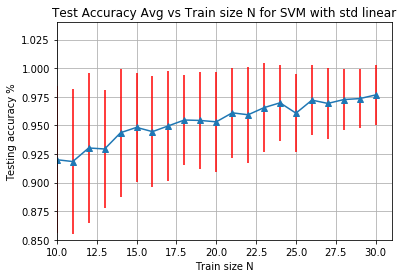

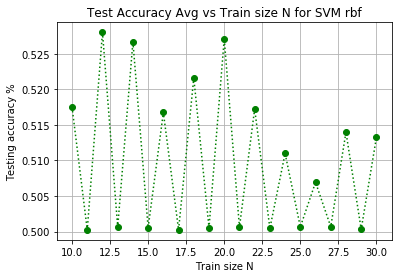

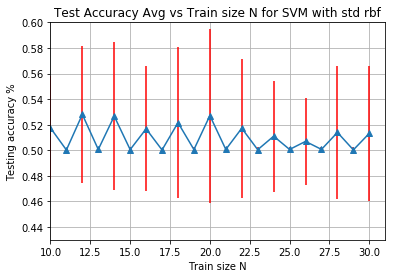

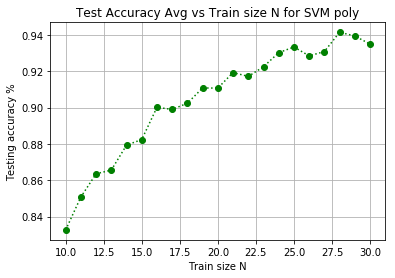

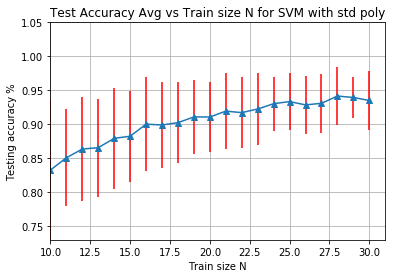

In [230]:
# Plot the per and svm data.

import matplotlib.pyplot as plt
for svm_data_2 in svm_kernel_2:
    plt.title('Test Accuracy Avg vs Train size N for SVM {kernel}'.format(kernel=svm_data_2[0][3]))
    plt.xlabel('Train size N')
    plt.ylabel('Testing accuracy %')
    plt.grid(True)
    # SVM data in green
    plt.plot(
        [point[0] for point in svm_data_2],
        [point[1] for point in svm_data_2],
        'g:'
    )
    plt.plot(
        [point[0] for point in svm_data_2],
        [point[1] for point in svm_data_2],
        'go'
    )
    # Same as above but with standard deviation
    plt.figure()
    plt.title('Test Accuracy Avg vs Train size N for SVM with std {kernel}'.format(kernel=svm_data_2[0][3]))
    plt.xlabel('Train size N')
    plt.ylabel('Testing accuracy %') 
    std = []
    std_uncertainty = []
    for point in svm_data_2:
        std.append(point[1])
        std_uncertainty.append(point[2])
    plt_min = round(min(std) - max(std_uncertainty), 2)
    plt_max = round(max(std) + max(std_uncertainty), 2)
    plt.axis([10, 31, plt_min, plt_max])
    plt.grid(True)
    plt.errorbar(
        [point[0] for point in svm_data_2],
        [point[1] for point in svm_data_2],
        [point[2] for point in svm_data_2],
        ecolor='r',
        marker='^'
    )
    plt.show()

### Experiment 3
Same as 1 but with convergence

In [233]:
import statistics
from ml import datagen
from sklearn import svm

dimensions = 2
learning_rate = 0.25
n_start = 2
n_end = 10
samples_per_n = 100

# data will contain n_end-n_start elements.
# Each element with consist of [N, average accuracy, standard deviation]

svm_kernel_3 = []
for kernel in (('linear', 'rbf', 'poly')):
    svm_data_3 = []

    for train_size in range(n_start, n_end+1):
        print('generating', train_size)

        # Contains accuracies
        svm_samples = []
        for __ in range(samples_per_n):

            # 1. Generate train set with at least 1 of each class
            train_set = []
            train_labels = []
            while list(train_labels).count(1) < 1 or list(train_labels).count(-1) < 1:
                train_set, train_labels = map(
                    np.array,
                    datagen.make_uniform(train_size, x_start, x_end, y_start, y_end, margin)
                )

            # 2. Train / fit perceptron and SVM.


            clf = svm.SVC(kernel=kernel, C=1.0)
            clf.fit(train_set, train_labels)

            # 3. Gather classification accuracy data.
            svm_results = clf.predict(test_set)

            svm_acc = sum(1 if x == y else 0 for x, y in zip(svm_results, test_labels))
            svm_acc /= len(test_set)

            svm_samples.append(svm_acc)

        svm_avg = statistics.mean(svm_samples)
        svm_std = statistics.pstdev(svm_samples)
        svm_data_3.append([train_size, svm_avg, svm_std, kernel])
    svm_kernel_3.append(svm_data_3)

generating 2
generating 3
generating 4
generating 5
generating 6
generating 7
generating 8
generating 9
generating 10
generating 2
generating 3
generating 4
generating 5
generating 6
generating 7
generating 8
generating 9
generating 10
generating 2
generating 3
generating 4
generating 5
generating 6
generating 7
generating 8
generating 9
generating 10


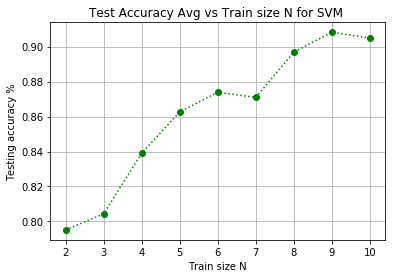

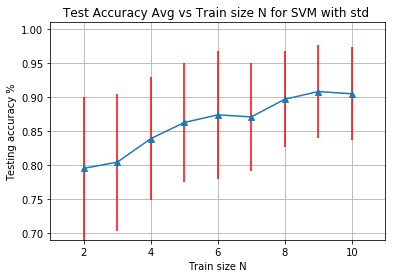

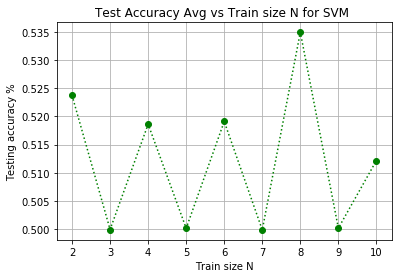

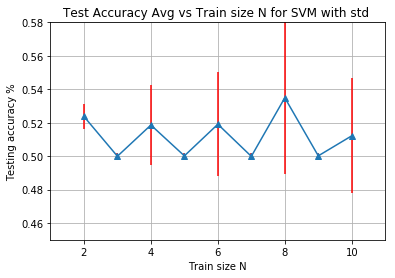

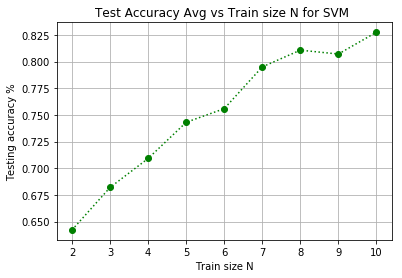

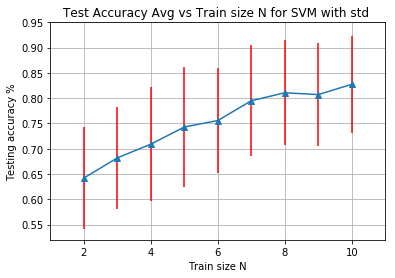

In [234]:
# Plot the per and svm data.

import matplotlib.pyplot as plt
for svm_data_3 in svm_kernel_3:
    plt.figure()
    plt.title('Test Accuracy Avg vs Train size N for SVM '.format(kernel=svm_data_3[0][3]))
    plt.xlabel('Train size N')
    plt.ylabel('Testing accuracy %')
    plt.grid(True)
    # SVM data in green
    plt.plot(
        [point[0] for point in svm_data_3],
        [point[1] for point in svm_data_3],
        'g:'
    )
    plt.plot(
        [point[0] for point in svm_data_3],
        [point[1] for point in svm_data_3],
        'go'
    )

    # Same as above but with standard deviation
    plt.figure()
    plt.title('Test Accuracy Avg vs Train size N for SVM with std '.format(kernel=svm_data_3[0][3]))
    plt.xlabel('Train size N')
    plt.ylabel('Testing accuracy %')
    std = []
    std_uncertainty = []
    for point in svm_data_3:
        std.append(point[1])
        std_uncertainty.append(point[2])
    plt_min = round(min(std) - max(std_uncertainty), 2)
    plt_max = round(max(std) + max(std_uncertainty), 2)
    plt.axis([1, 11, plt_min, plt_max])
    plt.grid(True)
    # Perceptron data in red
    plt.errorbar(
        [point[0] for point in svm_data_3],
        [point[1] for point in svm_data_3],
        [point[2] for point in svm_data_3],
        ecolor='r',
        marker='^'
    )


    plt.show()

In [ ]:
import statistics
from ml import datagen
from ml.perceptron import Perceptron
from sklearn import svm

dimensions = 2
learning_rate = 0.25
n_start = 20
n_end = 40
samples_per_n = 100

# data will contain n_end-n_start elements.
# Each element with consist of [N, average accuracy, standard deviation]
per_data_4 = []
svm_data_4 = []

for train_size in range(n_start, n_end+1):
    print('generating', train_size)
    
    # Contains accuracies
    per_samples = []
    svm_samples = []
    for __ in range(samples_per_n):
        
        # 1. Generate train set with at least 1 of each class
        train_set = []
        train_labels = []
        while list(train_labels).count(1) < 1 or list(train_labels).count(-1) < 1:
            train_set, train_labels = map(
                np.array,
                datagen.make_uniform(train_size, x_start, x_end, y_start, y_end, margin)
            )
        
        # 2. Train / fit perceptron and SVM.
        brain = Perceptron(dimensions, learning_rate)
        brain.train(train_set, train_labels)
        brain.train(train_set, train_labels)
        brain.train(train_set, train_labels)

        
        clf = svm.SVC(kernel='linear', C=1.0)
        clf.fit(train_set, train_labels)
        
        # 3. Gather classification accuracy data.
        svm_results = clf.predict(test_set)
        brain_results = [brain.classify(point) for point in test_set]
        
        brain_acc = sum(1 if x == y else 0 for x, y in zip(brain_results, test_labels))
        brain_acc /= len(test_set)
        svm_acc = sum(1 if x == y else 0 for x, y in zip(svm_results, test_labels))
        svm_acc /= len(test_set)
        
        per_samples.append(brain_acc)
        svm_samples.append(svm_acc)
    
    per_avg = statistics.mean(per_samples)
    svm_avg = statistics.mean(svm_samples)
    per_std = statistics.pstdev(per_samples)
    svm_std = statistics.pstdev(svm_samples)
    per_data_4.append([train_size, per_avg, per_std])
    svm_data_4.append([train_size, svm_avg, svm_std])

In [ ]:
# Plot the per and svm data.

import matplotlib.pyplot as plt

plt.figure()
plt.title('Test Accuracy Avg vs Train size N for Perceptron and SVM')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.grid(True)
# Perceptron data in red
plt.plot(
    [point[0] for point in per_data_4],
    [point[1] for point in per_data_4],
    'r:'
)
plt.plot(
    [point[0] for point in per_data_4],
    [point[1] for point in per_data_4],
    'ro'
)
# SVM data in green
plt.plot(
    [point[0] for point in svm_data_4],
    [point[1] for point in svm_data_4],
    'g:'
)
plt.plot(
    [point[0] for point in svm_data_4],
    [point[1] for point in svm_data_4],
    'go'
)

# Same as above but with standard deviation
plt.figure()
plt.title('Test Accuracy Avg vs Train size N for Perceptron with std')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.axis([19, 41, 0, 1])
plt.grid(True)
# Perceptron data in red
plt.errorbar(
    [point[0] for point in per_data_4],
    [point[1] for point in per_data_4],
    [point[2] for point in per_data_4],
    ecolor='r',
    marker='^'
)

# Same as above but with standard deviation
plt.figure()
plt.title('Test Accuracy Avg vs Train size N for SVM with std')
plt.xlabel('Train size N')
plt.ylabel('Testing accuracy %')
plt.axis([19, 41, 0, 1])
plt.grid(True)
# Perceptron data in red
plt.errorbar(
    [point[0] for point in svm_data_4],
    [point[1] for point in svm_data_4],
    [point[2] for point in svm_data_4],
    ecolor='r',
    marker='^'
)


plt.show()